In [1]:
%matplotlib inline

## [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- imposes a penalty on coefficient sizes to address collinearity problems.
- cost function: $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$
- complexity parameter: $\alpha \geq 0$ - controls shrinkage. (larger $\alpha$ = greater shrinkage = more robustness to collinearity.)

In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

print(reg.coef_, reg.intercept_)

[0.34545455 0.34545455] 0.13636363636363638


#### example: print coefficients as f(regularization)
- shows effect of collinarity on estimator's coefficients.
- each color = distinct feature of coefficient vector, and displayed as function of regularization.
- illustrates the value of Ridge regression on highly ill-conditioned matrices.
- when $/alpha/$ is large, regularization dominates the loss function - coefficents trend towards zero.
- when $/alpha/$ approaches zero, solution trends towards OLS (coefficients have big oscillations).

In [3]:
# X is the 10x10 Hilbert matrix
X        = 1./(np.arange(1, 11) 
               + np.arange(0, 10)[:, np.newaxis])
y        = np.ones(10)
n_alphas = 200
alphas   = np.logspace(-10, -2, n_alphas)
coefs    = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

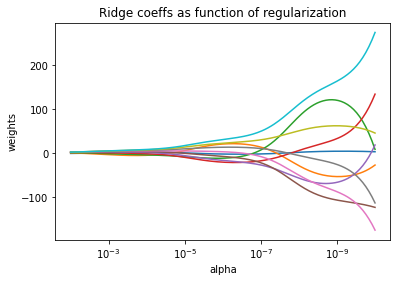

In [4]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coeffs as function of regularization')
plt.axis('tight')
plt.show()

## [Ridge Classification](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)
- Converts targets to ```{-1,1}```, then treats the problem as a regression.
- Predicted classes correspond to the regressor's predicted sign.
- Also works for multiclass classification (as a multi-output regression) - predicted class corresponds to highest-value outputs.
- Why use least squares, instead of logistic or hinge, as a loss function?
    - 1) they typically return similar cross-validation scores (accuracy, precision/recall)
    - 2) LS allows use to use different (faster) numerical solvers.
    - 3) Especially so for high numbers of classes because the main computation (the projection function $(X^T X)^{-1} X^T$ needs to happen only once.)
- Sometimes called a [Least Squares SVM](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine) with a linear kernel.
- Same complexity as OLS.
- [linear algebra solver options](linear-algebra-solver-options.md) (see API)

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier

X, y = load_breast_cancer(return_X_y=True)
clf  = RidgeClassifier().fit(X, y)
print(X.shape,y.shape, clf.score(X, y))

(569, 30) (569,) 0.9595782073813708


## [Ridge regression via built-in cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)
- Defaults to a generalized (Leave-One-Out) form of CV.
- You can use [Grid Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) instead by including a fold value, eg ```cv=10```.

In [6]:
import numpy as np
from sklearn import linear_model

X = [[0, 0], [0, 0], [1, 1]]
y = [ 0,      .1,     1]

reg = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13))
reg.fit(X,y)

print(alphas.shape, reg.alpha_)
print(alphas.max(), alphas.min())

(200,) 0.01
0.01 1e-10
